In [1]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255317 sha256=d47b7870721b73bb5f87144144c9331aa00ed2bc29cf6a32fbda6560f3b7a4a5
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import pickle5

In [3]:
class MyNeuralNetwork:
    def __init__(self, input_dimension):
        # define the keras model
        self.model = Sequential()
        self.model.add(Dense(1000, input_dim=input_dimension,
                             activation='relu'))
        self.model.add(Dense(1000, activation='relu'))
        self.model.add(Dense(1, activation='linear'))
        # compile the keras model
        self.model.compile(loss='mean_squared_error', optimizer='adam')

In [4]:
class Scaler:
    # save mean and variance of x, y sets
    def __init__(self, x, y):
        self.x_mean = np.mean(x, axis=0)
        self.y_mean = np.mean(y, axis=0)
        self.x_std = np.std(x, axis=0)
        self.y_std = np.std(y, axis=0)


    def get_x(self):
        # return saved mean and variance of x
        return self.x_std, self.x_mean

    def get_y(self):
        # return saved mean and variance of y
        return self.y_std, self.y_mean

In [5]:
with open('nn_data/qb_features.pkl', 'rb') as inp:
    qb_x = pickle5.load(inp)
with open('nn_data/qb_values.pkl', 'rb') as inp:
    qb_y = pickle5.load(inp)
with open('nn_data/qb_test_features.pkl', 'rb') as inp:
    qb_x_test_features = pickle5.load(inp)

with open('nn_data/rb_features.pkl', 'rb') as inp:
    rb_x = pickle5.load(inp)
with open('nn_data/rb_values.pkl', 'rb') as inp:
    rb_y = pickle5.load(inp)
with open('nn_data/rb_test_features.pkl', 'rb') as inp:
    rb_x_test_features = pickle5.load(inp)

with open('nn_data/wr_features.pkl', 'rb') as inp:
    wr_x = pickle5.load(inp)
with open('nn_data/wr_values.pkl', 'rb') as inp:
    wr_y = pickle5.load(inp)
with open('nn_data/wr_test_features.pkl', 'rb') as inp:
    wr_x_test_features = pickle5.load(inp)

with open('nn_data/te_features.pkl', 'rb') as inp:
    te_x = pickle5.load(inp)
with open('nn_data/te_values.pkl', 'rb') as inp:
    te_y = pickle5.load(inp)
with open('nn_data/te_test_features.pkl', 'rb') as inp:
    te_x_test_features = pickle5.load(inp)

qb_N = len(qb_y)
rb_N = len(rb_y)
wr_N = len(wr_y)
te_N = len(te_y)

print(qb_N)
print(rb_N)
print(wr_N)
print(te_N)

print(len(qb_x_test_features))
print(len(rb_x_test_features))
print(len(wr_x_test_features))
print(len(te_x_test_features))

215
336
594
325
83
146
225
119


In [ ]:
#  divide data on training set and test set; here  80% of data is used for training and 20% for testing
idx_train = np.random.choice(np.arange(len(x)), int(N * 0.8), replace=False)  # indexes included in training set
idx_test = np.ones((N,), bool)
idx_test[idx_train] = False  # indexes included in the test set
x_train = x[idx_train]
x_test = x[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [ ]:
neural_network = MyNeuralNetwork(input_dimension=675)  # create a neural network object; 675 is a number of features

In [ ]:
# normilize data
normalizer = Scaler(x_train, y_train)
std_x, mean_x = normalizer.get_x()
x_train_norm = (x_train - mean_x) / std_x
x_test_norm = (x_test - mean_x) / std_x
std_y, mean_y = normalizer.get_y()
y_train_norm = (y_train - mean_y) / std_y

In [ ]:
# TRAINING/FINDING PARAMETERS

# fit the model
# neural_network.model.fit(x_train_norm, y_train_norm, epochs=1000, batch_size=15)  # train neural network
neural_network.model.fit(x_train, y_train, epochs=5000, batch_size=10)

#y_from_nn_norm = neural_network.model.predict(x_test_norm)  # predict values for x_test states
#y_from_nn = y_from_nn_norm * std_y + mean_y  # tranform the results into original scaling
y_from_nn = neural_network.model.predict(x_test)

mse = mean_squared_error(y_test, y_from_nn) # compute mean squared error
print('Mean squared error: ', mse)

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
18/18 [==============================] - 1s 32ms/step - loss: 42.3649
Epoch 2503/5000
18/18 [==============================] - 1s 31ms/step - loss: 35.4284
Epoch 2504/5000
18/18 [==============================] - 1s 29ms/step - loss: 29.1405
Epoch 2505/5000
18/18 [==============================] - 1s 28ms/step - loss: 30.1534
Epoch 2506/5000
18/18 [==============================] - 1s 30ms/step - loss: 23.8166
Epoch 2507/5000
18/18 [==============================] - 1s 31ms/step - loss: 22.8436
Epoch 2508/5000
18/18 [==============================] - 1s 30ms/step - loss: 21.8153
Epoch 2509/5000
18/18 [==============================] - 1s 30ms/step - loss: 20.0547
Epoch 2510/5000
18/18 [==============================] - 1s 29ms/step - loss: 24.1136
Epoch 2511/5000
18/18 [==============================] - 1s 30ms/step - loss: 24.7239
Epoch 2512/5000
18/18 [==============================] - 1s 32ms/step - loss: 23.1298
Epo

In [6]:
# TESTING ON 2022 SEASON
positions = ["qb", "rb", "wr", "te"]

for position in positions:
    print(position)
    if position == "qb":
        x = qb_x
        y = qb_y
        x_test_features = qb_x_test_features
    elif position == "rb":
        x = rb_x
        y = rb_y
        x_test_features = rb_x_test_features
    elif position == "wr":
        x = wr_x
        y = wr_y
        x_test_features = wr_x_test_features
    elif position == "te":
        x = te_x
        y = te_y
        x_test_features = te_x_test_features

    # Train neural network
    neural_network = MyNeuralNetwork(input_dimension=675)  # create a neural network object; 675 is a number of features
    neural_network.model.fit(x, y, epochs=5000, batch_size=10)

    # Predict for 2022 NFL season
    y_predictions = neural_network.model.predict(x_test_features)
    print(y_predictions)

    pkl_file = 'nn_data/' + position + '_predictions.pkl'
    txt_file = 'nn_data/' + position + '_predictions.txt'
    with open(pkl_file, 'wb') as outp:
        pickle5.dump(y_predictions, outp, pickle5.HIGHEST_PROTOCOL)
    with open(txt_file, "w") as file:
        file.write(str(y_predictions))

Streaming output truncated to the last 5000 lines.
Epoch 2561/5000
33/33 [==============================] - 1s 26ms/step - loss: 10.2785
Epoch 2562/5000
33/33 [==============================] - 1s 27ms/step - loss: 11.4884
Epoch 2563/5000
33/33 [==============================] - 1s 27ms/step - loss: 11.7602
Epoch 2564/5000
33/33 [==============================] - 1s 25ms/step - loss: 8.1482
Epoch 2565/5000
33/33 [==============================] - 1s 28ms/step - loss: 5.7088
Epoch 2566/5000
33/33 [==============================] - 1s 27ms/step - loss: 9.9715
Epoch 2567/5000
33/33 [==============================] - 1s 26ms/step - loss: 18.0954
Epoch 2568/5000
33/33 [==============================] - 1s 30ms/step - loss: 25.9295
Epoch 2569/5000
33/33 [==============================] - 1s 33ms/step - loss: 14.1572
Epoch 2570/5000
33/33 [==============================] - 1s 33ms/step - loss: 10.2698
Epoch 2571/5000
33/33 [==============================] - 1s 32ms/step - loss: 9.9497
Epoch 2

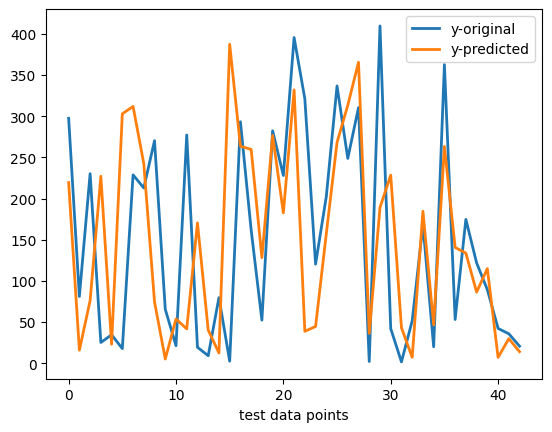

In [ ]:
# compare true and predicted values of y from the test set###
plt.plot(y_test, label="y-original", lw=2)
plt.plot(y_from_nn, label="y-predicted", lw=2)
plt.xlabel('test data points')
plt.legend()
plt.show()